<a href="https://www.kaggle.com/code/itsabhijith/crop-recommendation?scriptVersionId=162566412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import pickle

In [2]:
df = pd.read_csv("./Data/Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df = df.iloc[:,0:8]

In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
correlation_data = df.iloc[:,:-1].corr()

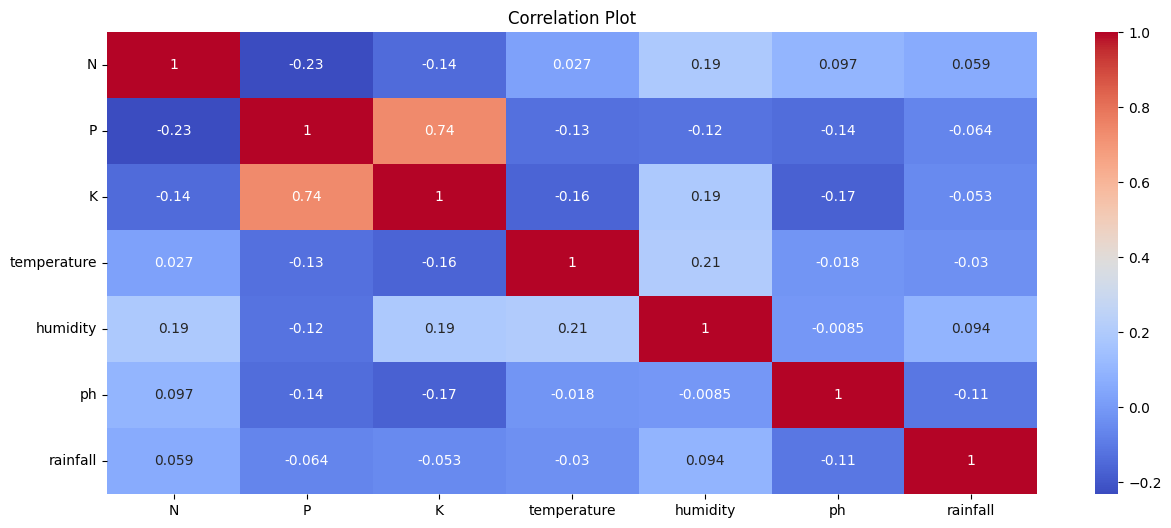

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(correlation_data,annot=True,cmap ='coolwarm')
plt.title("Correlation Plot")
plt.show()

c:\Users\abhij\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x600 with 0 Axes>

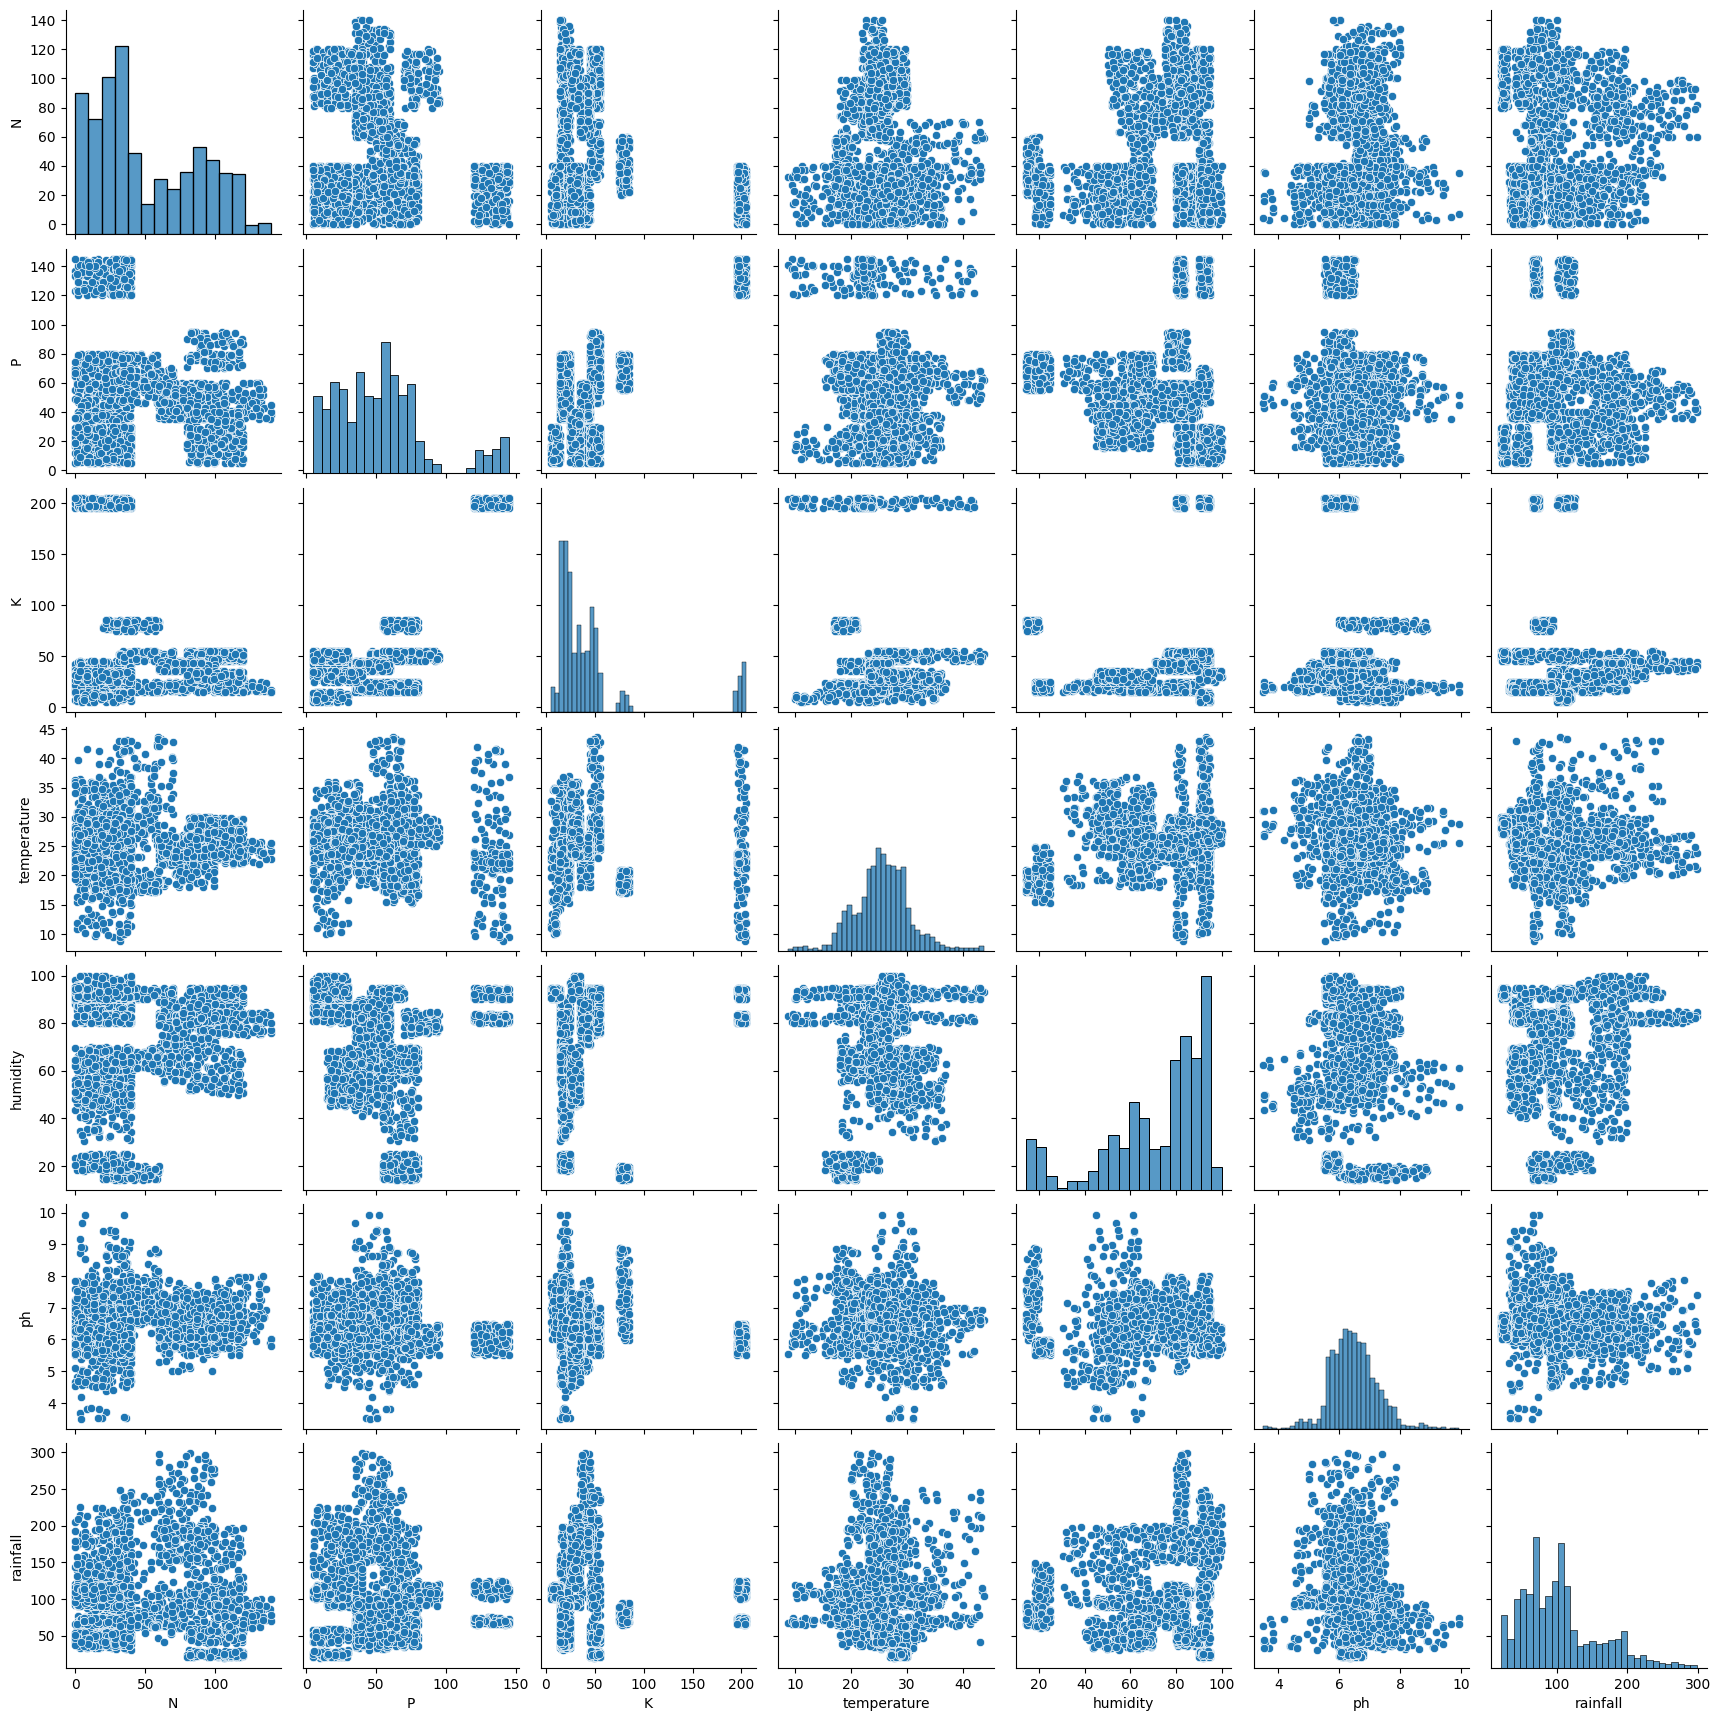

In [12]:
plt.figure(figsize=(15,6))
sns.pairplot(df)
plt.show()

def label_crop(crop):
    return 'Fruit' if crop in ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee'] else 'Grain'

In [3]:
def label_crop(crop):
    if crop in ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee']:
        return 'Fruit'
    elif crop in ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']:
        return 'Grain'
    return 'Fiber'

In [4]:
def get_sowing_season(crop):
    return 'Summer' if crop in ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'kidneybeans', 'cotton', 'jute', 'watermelon', 'muskmelon','coffee'] else 'Winter'

In [5]:
df['Crop_Type'] = df.label.apply(lambda row: label_crop(row))
df['Sown_Season'] = df.label.apply(lambda row: get_sowing_season(row))

In [17]:
df.Crop_Type.value_counts()

Crop_Type
Fruit    1100
Grain     900
Fiber     200
Name: count, dtype: int64

In [18]:
df.Sown_Season.value_counts()

Sown_Season
Summer    1200
Winter    1000
Name: count, dtype: int64

In [6]:
crops_list = df.label.unique().tolist()

<p><b><h2>Analyzing crops by sowing season</h2></b><br> 
The following checks will be performed:
    <ol>
        <li> Nitrogen, Phospherus, Potassium analysis by crop type.</li>
        <li> Rainfall required for each crop by season </li>
    </ol>
</p>


In [30]:
def plot_nutrients_per_crop_type(crop_df:pd.DataFrame,nutrient:str,crop_type:str)->None:
    plt.figure(figsize=(12,6))
    sns.boxplot(data = crop_df, x="label", y=nutrient)
    plt.xlabel(crop_type)
    plt.ylabel(f"{nutrient} Ratio in soil")
    plt.title(f"{nutrient} content required for {crop_type}")
    plt.show()

In [16]:
nutrients = ["N","P","K"]
crop_types = df.Crop_Type.unique()
crop_type_nutrients = [(crop_type, nutrient) for crop_type in crop_types for nutrient in nutrients]    

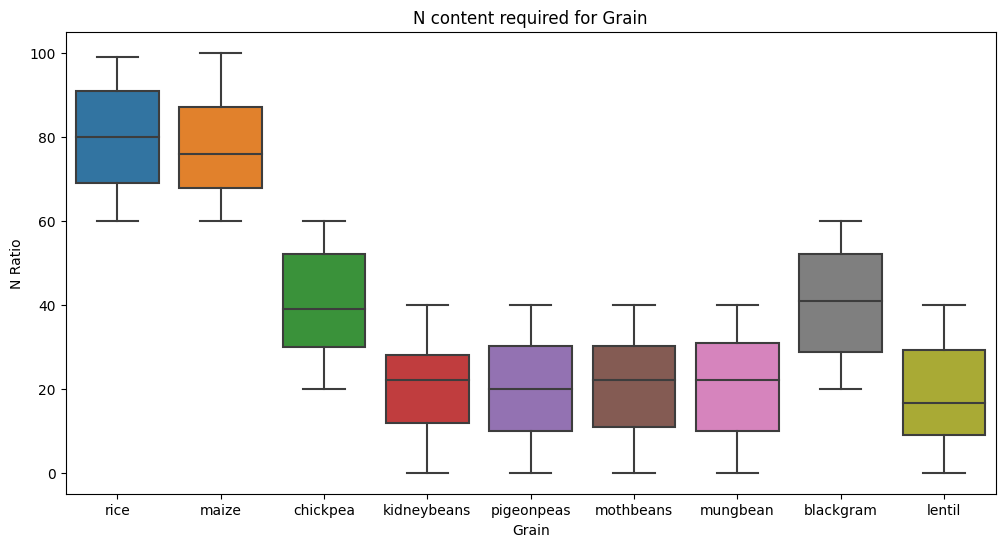

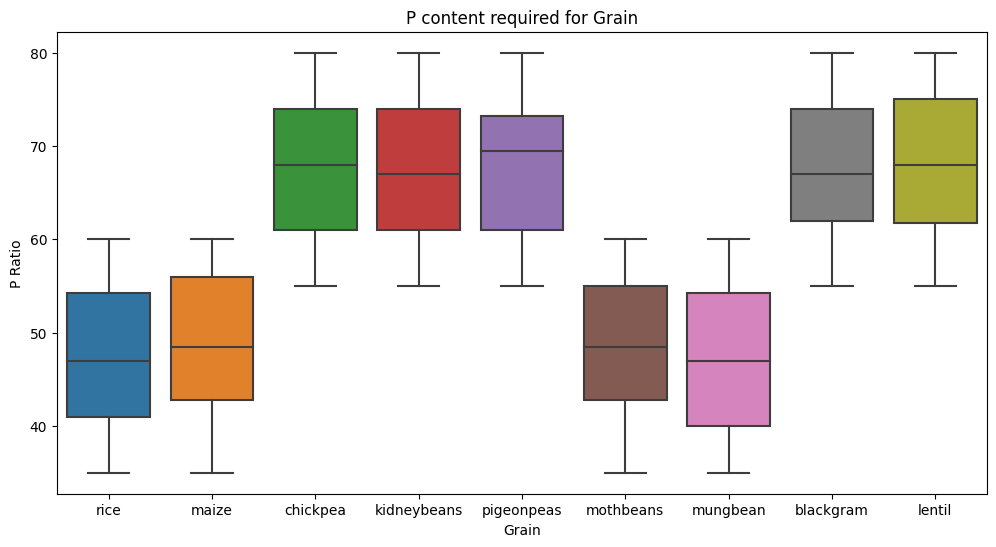

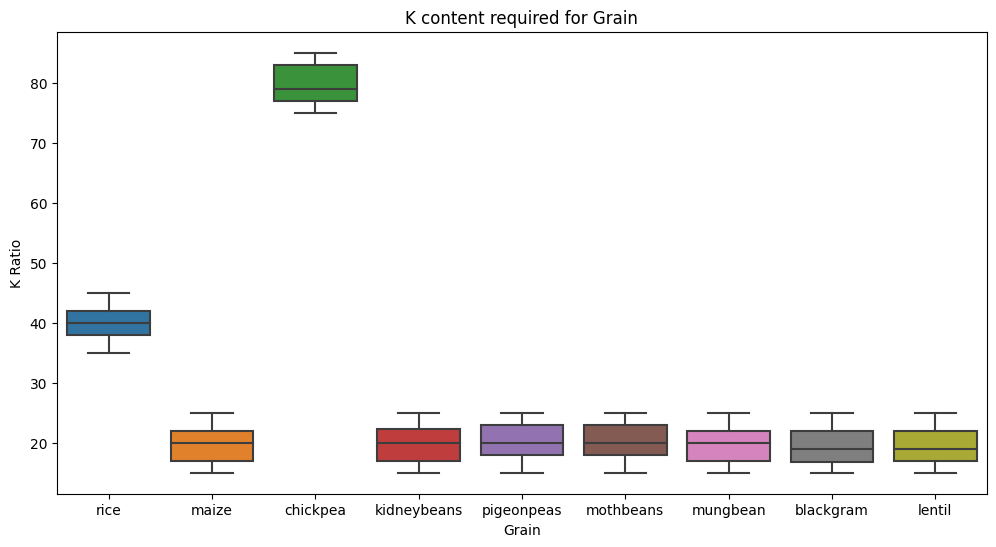

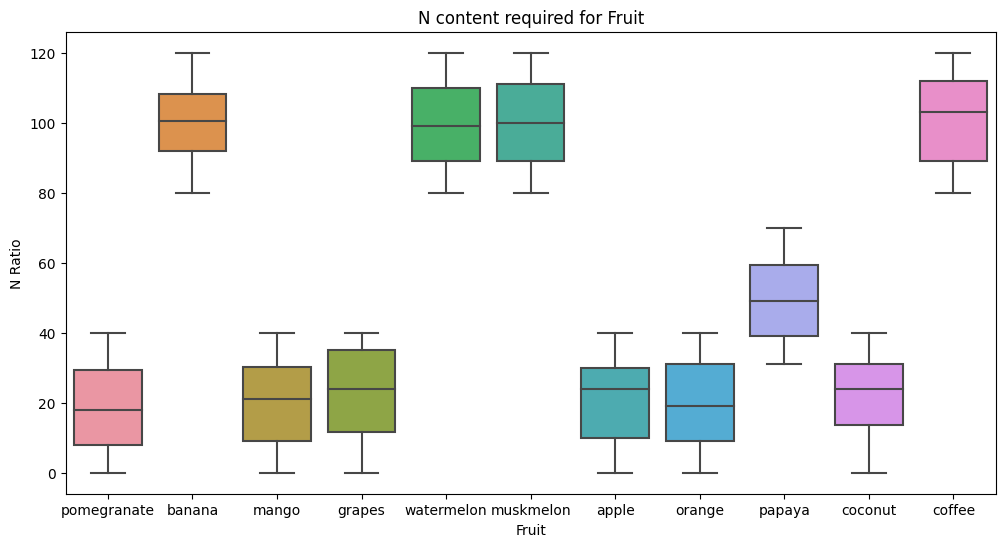

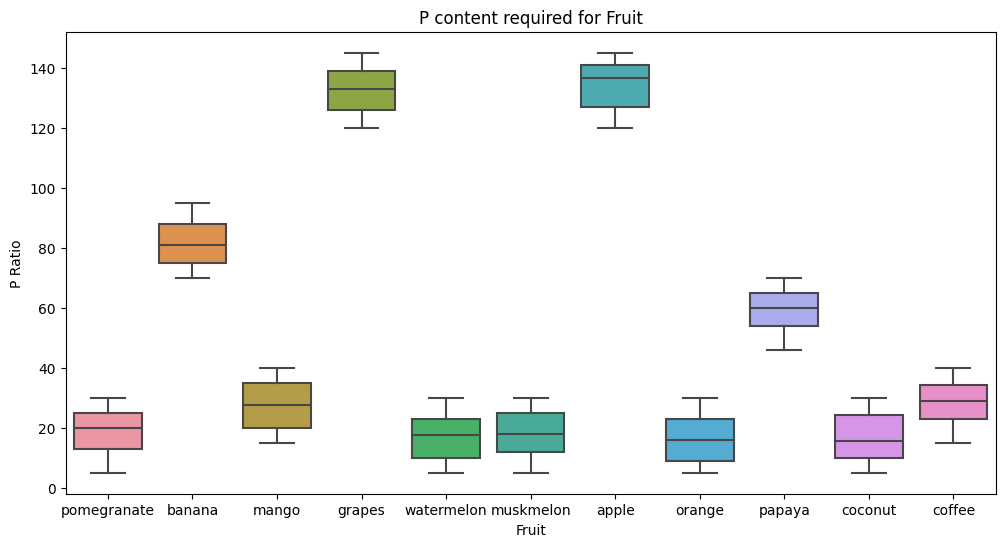

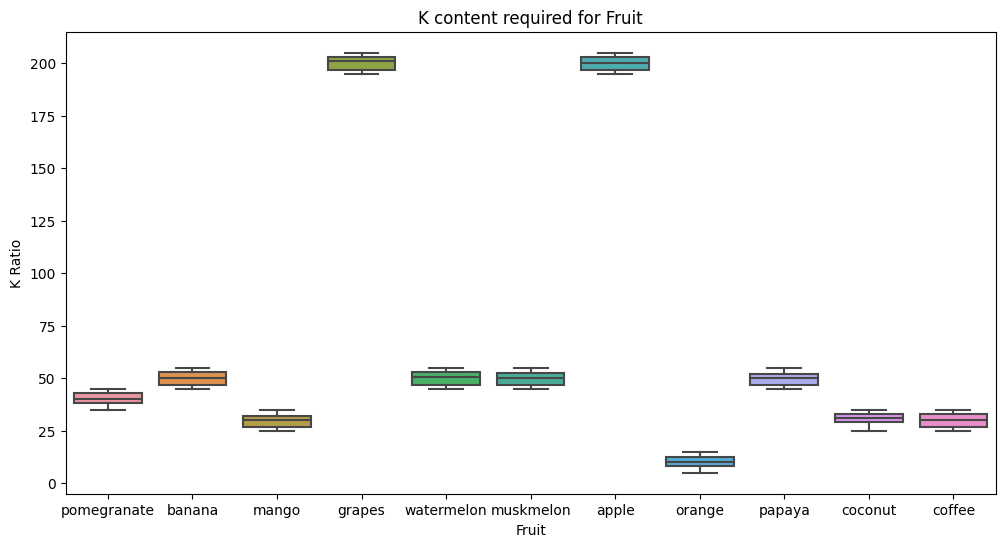

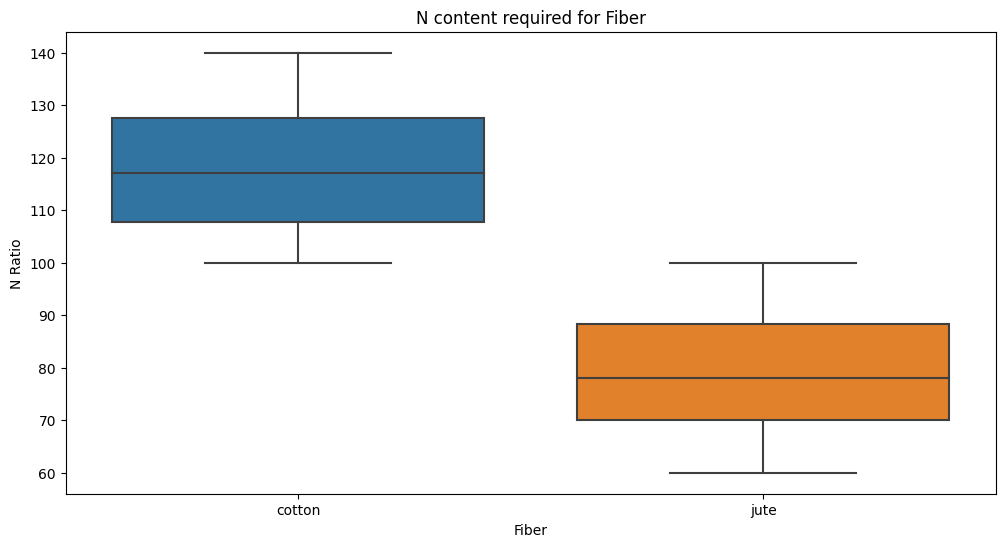

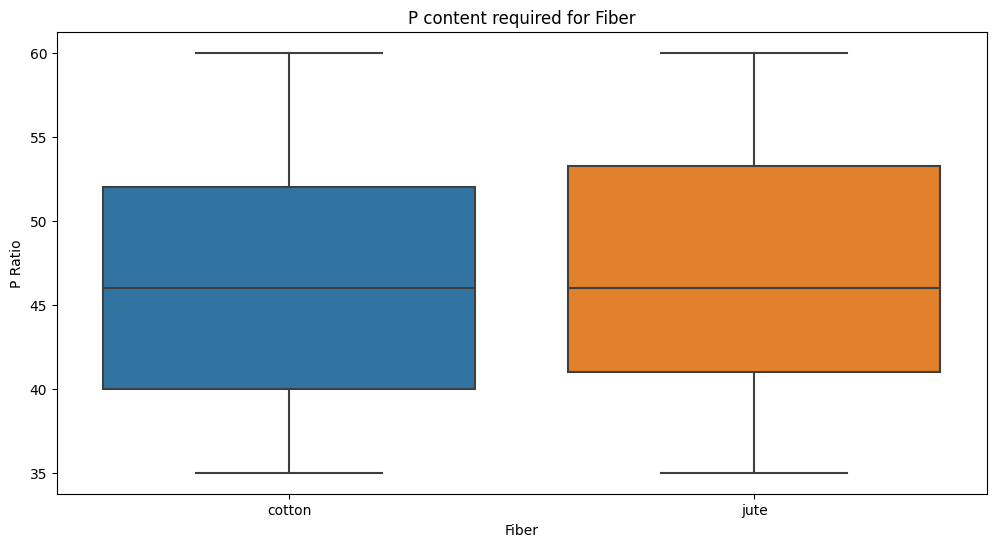

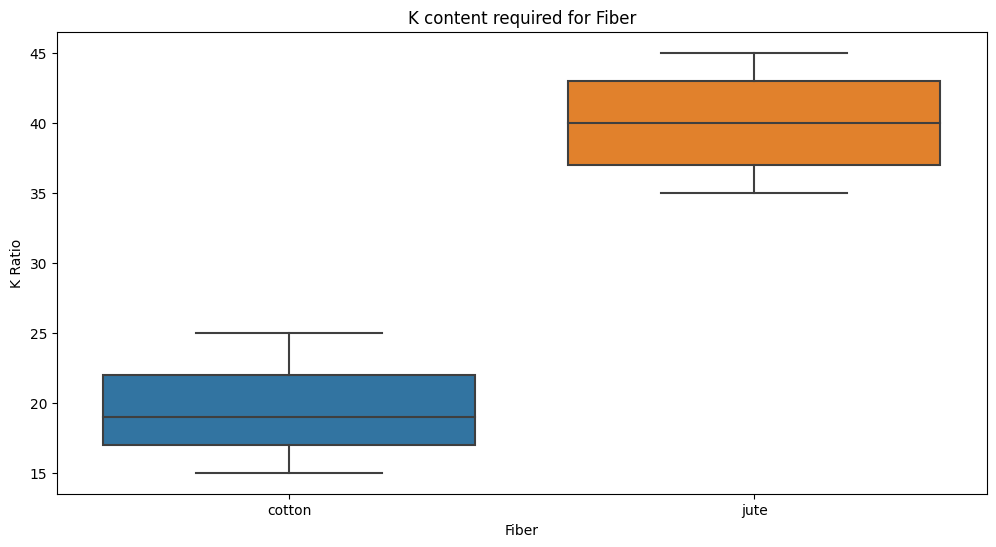

In [31]:
for crop, nutrient in crop_type_nutrients:
    crop_df = df[df.Crop_Type==crop]
    plot_nutrients_per_crop_type(crop_df,nutrient,crop)

In [42]:
def plot_features_per_crop_type(crop_df:pd.DataFrame,crop_type:str,feature:str)->None:
    plt.figure(figsize=(12,6))
    sns.boxplot(data = crop_df, x="label", y=feature)
    plt.xlabel(crop_type)
    plt.ylabel(f"{feature.capitalize()}")
    plt.title(f"{feature.capitalize()} required per {crop_type}")
    plt.show()

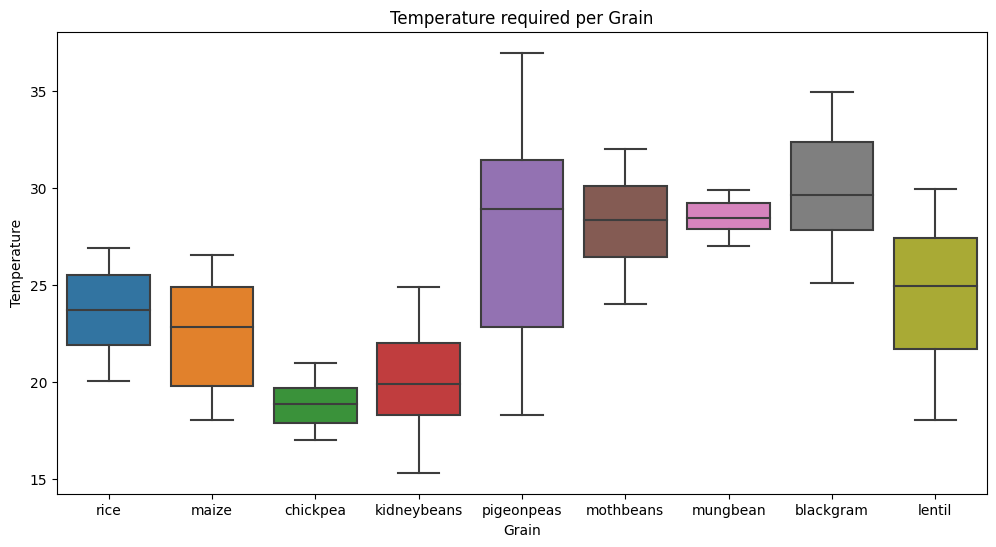

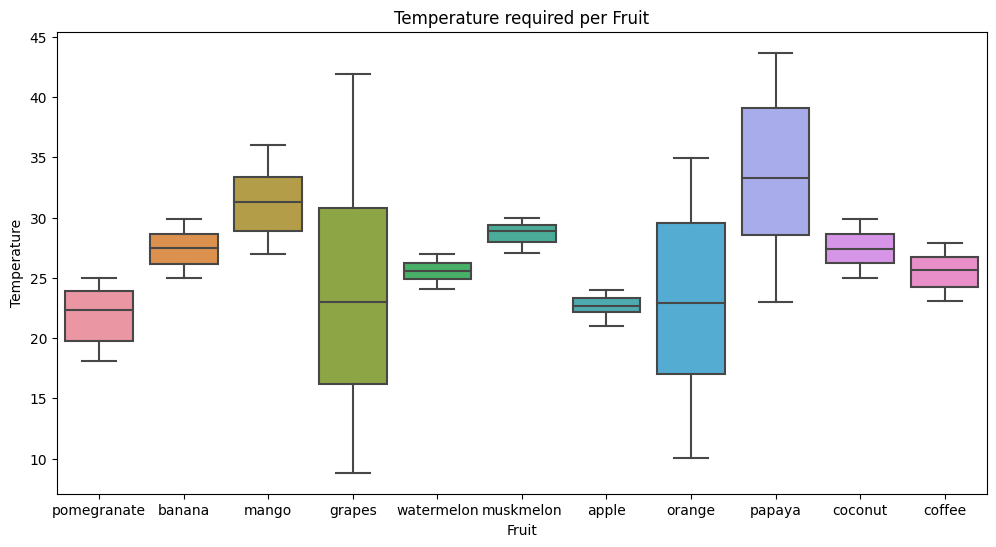

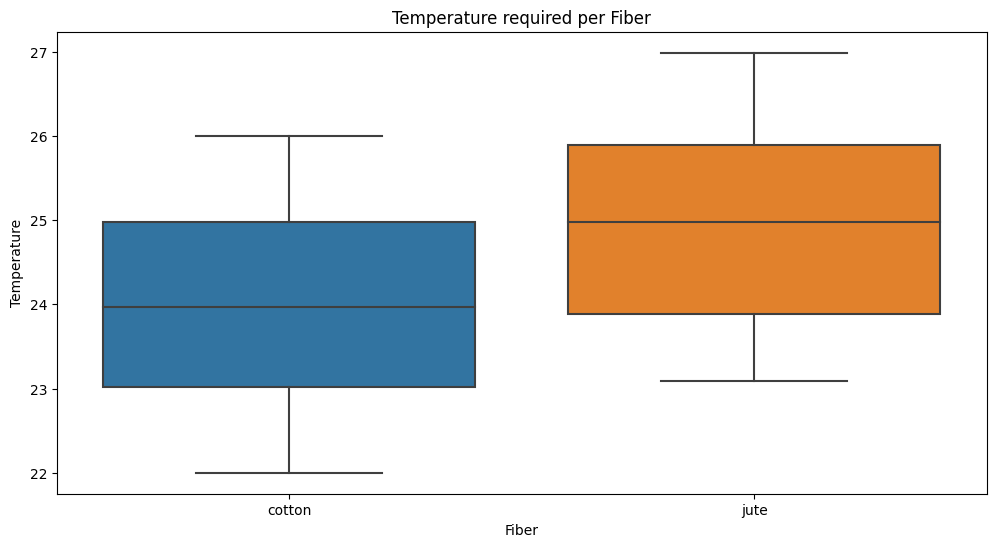

In [43]:
for crop_type in crop_types:
    crop_df = df[df.Crop_Type==crop_type]
    plot_features_per_crop_type(crop_df,crop_type,"temperature")

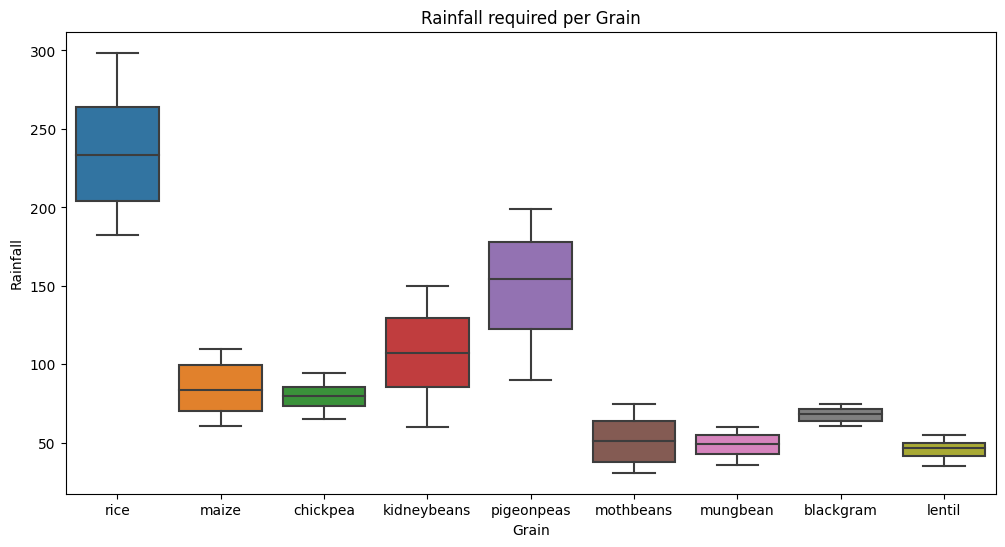

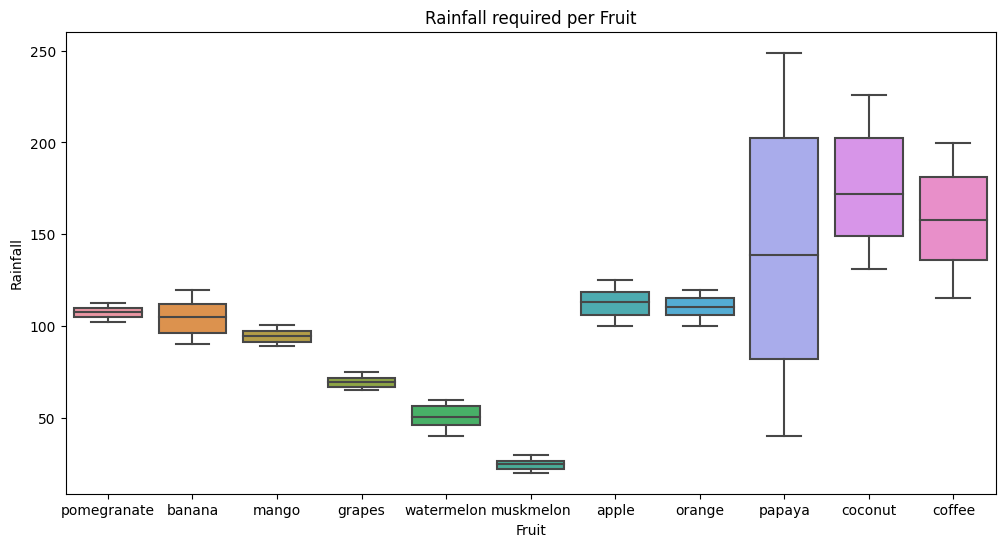

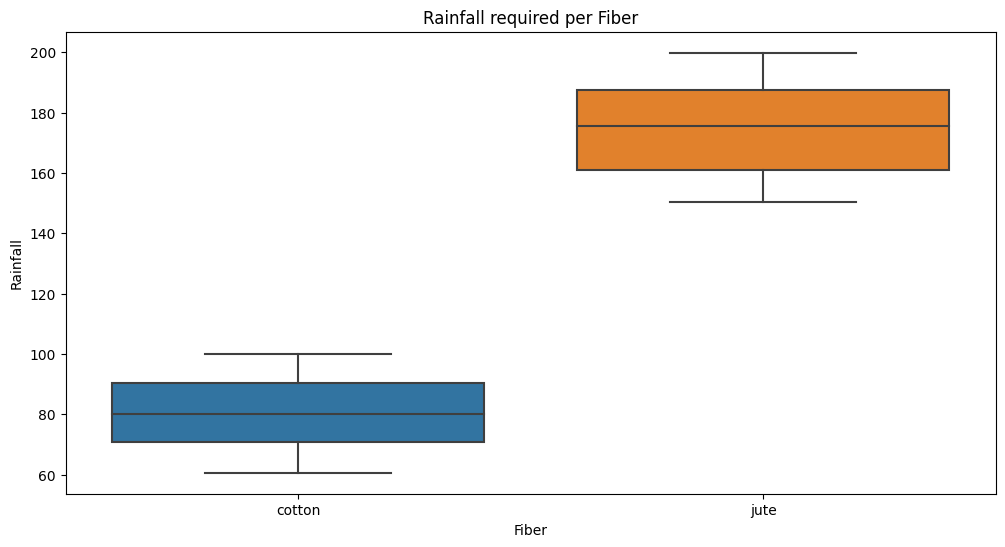

In [44]:
for crop_type in crop_types:
    crop_df = df[df.Crop_Type==crop_type]
    plot_features_per_crop_type(crop_df,crop_type,"rainfall")

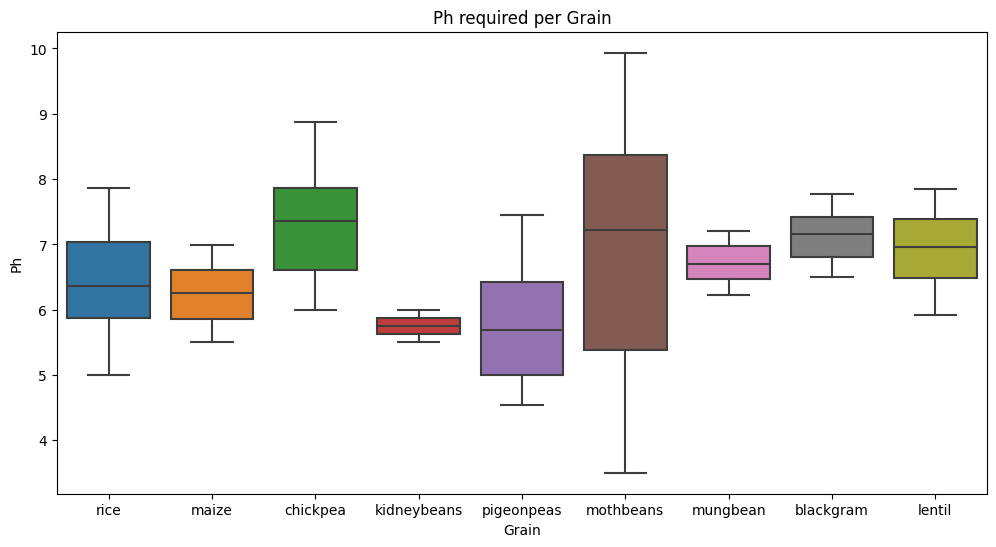

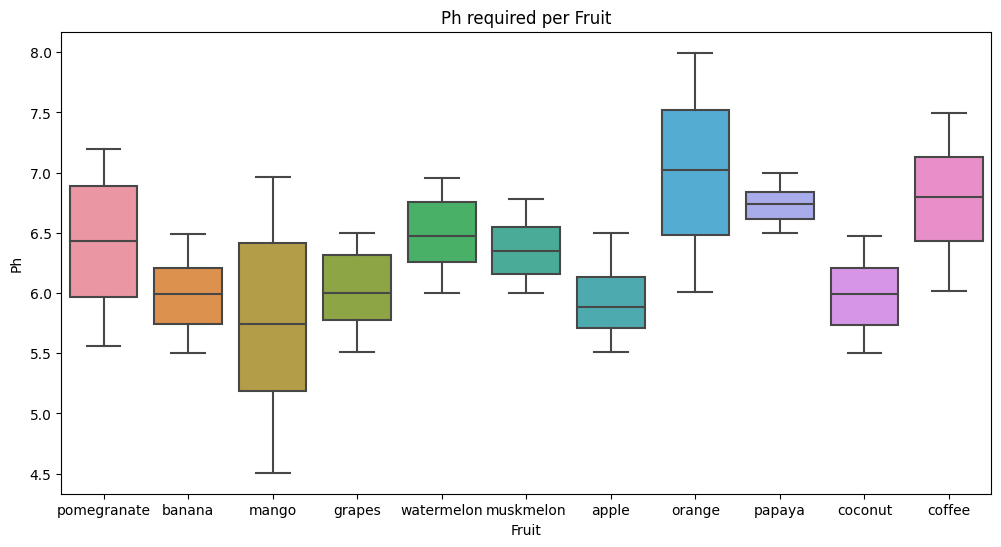

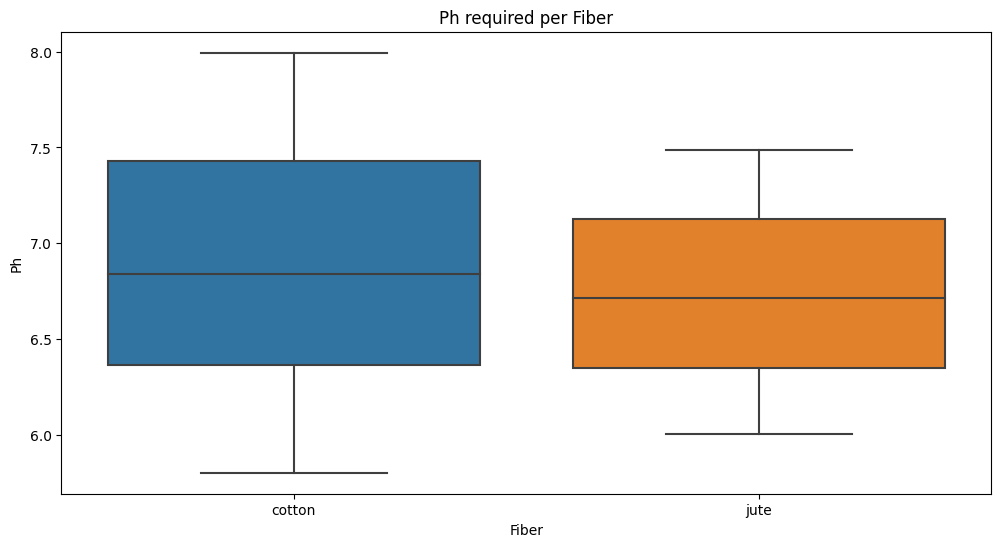

In [45]:
for crop_type in crop_types:
    crop_df = df[df.Crop_Type==crop_type]
    plot_features_per_crop_type(crop_df,crop_type,"ph")

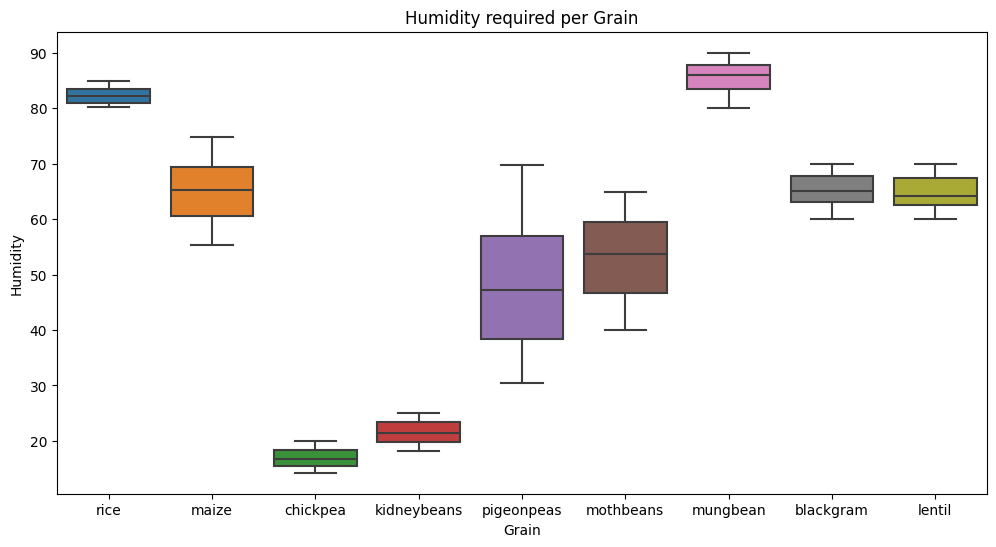

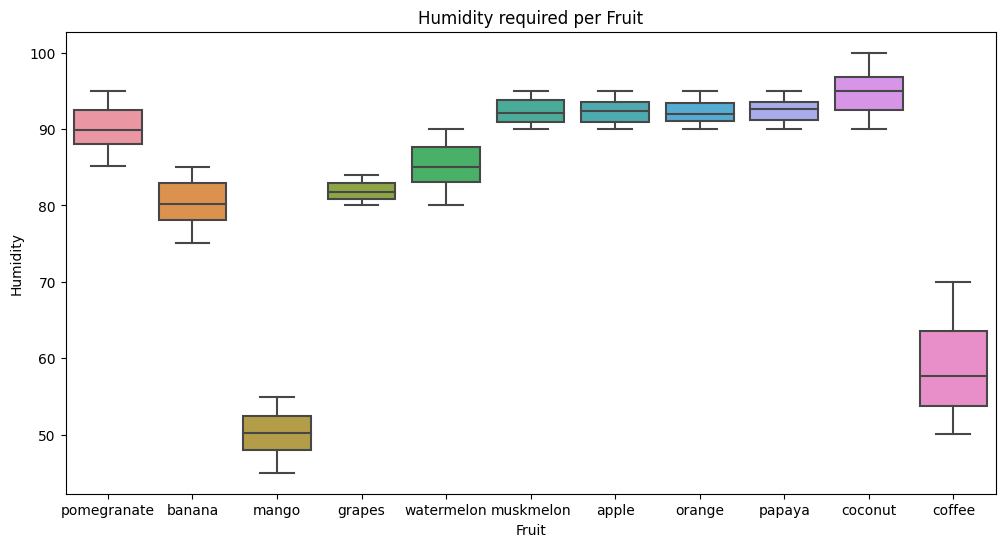

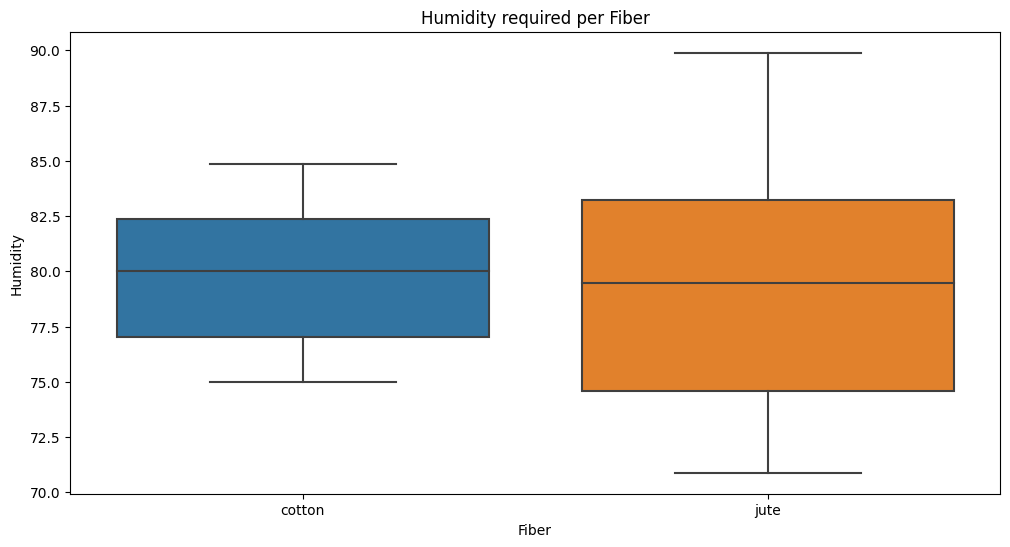

In [46]:
for crop_type in crop_types:
    crop_df = df[df.Crop_Type==crop_type]
    plot_features_per_crop_type(crop_df,crop_type,"humidity")

<h3> Feature Encoding </h3>

In [20]:
ohe_features = ['Sown_Season']
encoding_features_indices = []

In [21]:
for index, col in enumerate(df.columns):
    if col in ohe_features:
        encoding_features_indices.append(index)

In [22]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',preprocessing.OneHotEncoder(),
                                      encoding_features_indices)])

In [23]:
df_encoded = ct.fit_transform(df) 
crop_df_encoded = pd.DataFrame(df_encoded, columns = ct.get_feature_names_out())

In [24]:
crop_df_encoded.columns

Index(['encoder__Sown_Season_Summer', 'encoder__Sown_Season_Winter'], dtype='object')

In [25]:
encoded_cols = [col.split("encoder__")[1] for col in crop_df_encoded.columns]
crop_df_encoded.columns = encoded_cols

In [26]:
ohe_features.extend(['Sown_Season_Winter'])

In [27]:
df = pd.concat([df.reset_index(drop=True),crop_df_encoded.reset_index(drop=True)],axis=1)

In [28]:
df = df.drop(ohe_features,axis=1)

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Crop_Type,Sown_Season_Summer
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Grain,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Grain,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Grain,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Grain,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Grain,1.0


In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
df.label = label_encoder.fit_transform(df.label)

In [32]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df.drop(['label','Crop_Type'],axis=1),df.label,test_size = 0.20,random_state = 42)

In [33]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall,Sown_Season_Summer
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,0.0
752,37,79,19,27.543848,69.347863,7.143943,69.408782,1.0
892,7,73,25,27.521856,63.132153,7.288057,45.208411,0.0
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,0.0
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,0.0


<h3> Building the models </h3>

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_clf = GaussianNB().fit(X_train,Y_train)

In [36]:
Y_pred = nb_clf.predict(X_test)

In [37]:
metrics.accuracy_score(Y_test,Y_pred)

0.9954545454545455

In [38]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

<h3> Building random forest model </h3>

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_clf = RandomForestClassifier().fit(X_train,Y_train)

In [41]:
Y_pred_clf = rf_clf.predict(X_test)

In [42]:
metrics.accuracy_score(Y_test,Y_pred_clf)

0.9954545454545455

In [43]:
print(metrics.classification_report(Y_test,Y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [44]:
pickle.dump(rf_clf,open("model.pkl","wb"))
pickle.dump(label_encoder,open("labelencoder.pkl","wb"))

In [45]:
model = pickle.load(open("model.pkl","rb"))

In [46]:
predicted_class = model.predict([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536,1.0]])

c:\Users\abhij\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
label_encoder.inverse_transform(predicted_class)

array(['rice'], dtype=object)